In [1]:
from collections import OrderedDict

import torch
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

from learning_ai import models
from learning_ai import helpers

In [2]:
# Use standard FashionMNIST dataset
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)
test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

In [3]:
# put all hyper params into a OrderedDict, easily expandable
params = OrderedDict(
    lr = [.001],
    batch_size = [1000],
    shuffle = [False]
)
epochs = 3

In [4]:
m = helpers.RunManager()

# get all runs from params using RunBuilder class
for run in helpers.RunBuilder.get_runs(params):

    # if params changes, following line of code should reflect the changes too
    network = models.Network()
    loader = torch.utils.data.DataLoader(train_set, batch_size = run.batch_size)
    optimizer = torch.optim.Adam(network.parameters(), lr=run.lr)

    m.begin_run(run, network, loader)
    for epoch in range(epochs):
      
      m.begin_epoch()
      for batch in loader:
        
        images = batch[0]
        labels = batch[1]
        preds, embedding = network(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        m.track_loss(loss)
        m.track_num_correct(preds, labels)

      m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results')

/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: 

tensor(9.5356, grad_fn=<MaxBackward1>)
tensor(9)
Ankle boot
Ankle boot


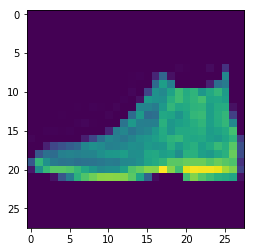

tensor(8.5376, grad_fn=<MaxBackward1>)
tensor(2)
Pullover
Pullover


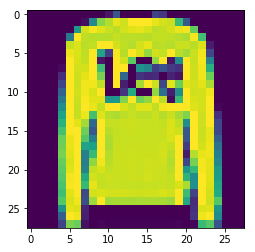

tensor(11.2111, grad_fn=<MaxBackward1>)
tensor(1)
Trouser
Trouser


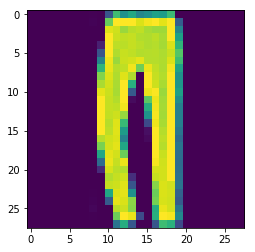

tensor(8.1781, grad_fn=<MaxBackward1>)
tensor(1)
Trouser
Trouser


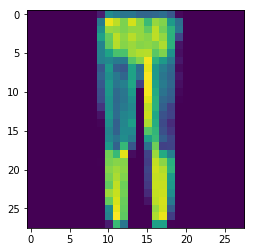

tensor(4.3515, grad_fn=<MaxBackward1>)
tensor(2)
Pullover
Shirt


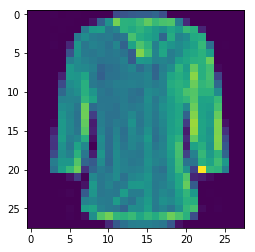

tensor(9.9528, grad_fn=<MaxBackward1>)
tensor(1)
Trouser
Trouser


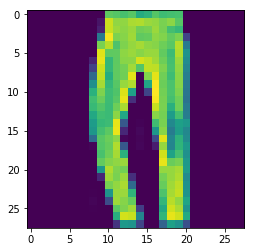

tensor(3.3788, grad_fn=<MaxBackward1>)
tensor(4)
Coat
Coat


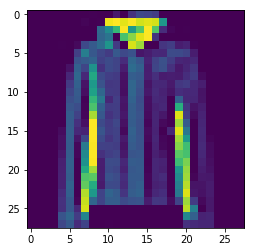

tensor(3.3552, grad_fn=<MaxBackward1>)
tensor(2)
Pullover
Shirt


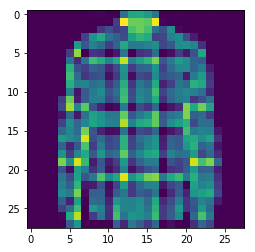

tensor(4.4289, grad_fn=<MaxBackward1>)
tensor(5)
Sandal
Sandal


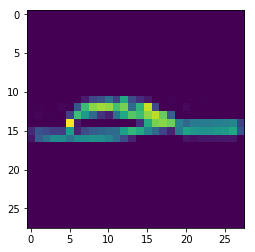

tensor(8.8702, grad_fn=<MaxBackward1>)
tensor(7)
Sneaker
Sneaker


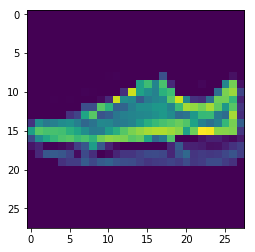

tensor(5.1568, grad_fn=<MaxBackward1>)
tensor(4)
Coat
Coat


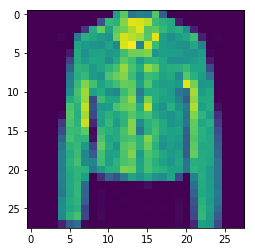

In [8]:
import matplotlib.pyplot as plt

network.eval()
count = 0
for images, labels in test_set:
    output, embedding = network(images[None, ...])
    print(torch.max(output))
    print(test_set.classes[torch.argmax(output)])
    print(test_set.classes[labels])

    plt.figure()
    plt.imshow(images[0])
    plt.show()
    if count == 10:
        break
    else:
        count+=1
    

In [7]:
embedding.shape

torch.Size([1, 60])